In [1]:
import numpy as np
import pandas as pd
from colorama import Back, Fore, Style
import time
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import manifold
import pyclustering as pyclus
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# missing_value=['?']
data= pd.read_csv("bupa.csv", encoding='latin1' )
print(data.isnull().sum())
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
X = data.iloc[:,:]
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])
# b : blue.
# g : green.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.

mcv         0
alkphos     0
sgpt        0
sgot        0
gammagt     0
drinks      0
selector    0
dtype: int64
(345, 7)
(345, 7)


In [11]:
'''Clustering algorithm for
large-scale data
K-means
BIRCH
CURE
'''

#### kmeans algorithm
from sklearn.cluster import KMeans
start = time.time()
kmean = KMeans(n_clusters=4, max_iter=500)
kmean.fit(X)
end = time.time()
print(Fore.BLUE + "k-mean algorithm time is :", end - start)
print(Fore.RESET)

labels = kmean.labels_
KMeans_Sil = metrics.silhouette_score(X, kmean.labels_, metric='euclidean')
print('Kmeans silhouette ',KMeans_Sil)
data['Kmeans_labels'] = kmean.labels_



k-mean algorithm time is : 0.07995200157165527

Kmeans silhouette  0.3423424729765894


In [12]:
centroids = kmean.cluster_centers_
labels = kmean.labels_
print(labels)

[0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 3 2 2 2 0 2 2 2 0 0 2 3 2
 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 1 2 2 0 0 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 0 2 0 0 2 0 2
 0 2 2 1 2 2 2 0 2 2 0 0 2 0 2 0 3 2 2 2 2 3 1 2 2 2 2 3 2 2 2 2 2 2 0 0 3
 2 2 3 0 2 2 3 3 3 0 0 2 0 2 2 0 2 2 3 3 3 0 0 3 2 0 3 0 3 2 1 2 3 3 0 2 3
 3 3 0 3 1 2 2 0 0 2 0 2 2 2 0 2 2 0 2 3 0 2 0 0 2 0 2 0 0 2 0 2 0 2 0 0 2
 2 2 2 2 0 3 0 3 2 2 1 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 2 0 2 2 2 2
 2 3 0 2 2 3 0 2 0 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 3 0 2
 2 0 2 3 2 2 2 2 0 2 3 2 2 0 3 3 2 2 2 1 3 2 0 0 0 2 1 2 2 2 0 2 0 2 1 0 0
 3 0 2 0 0 0 3 0 1 3 2 3]


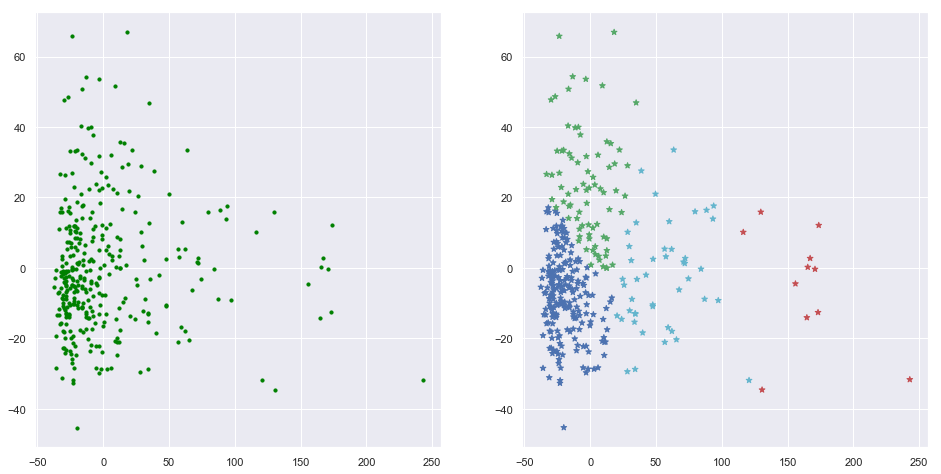

In [13]:
########## PCA of features for Kmeans
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')


Computing embedding
Done.


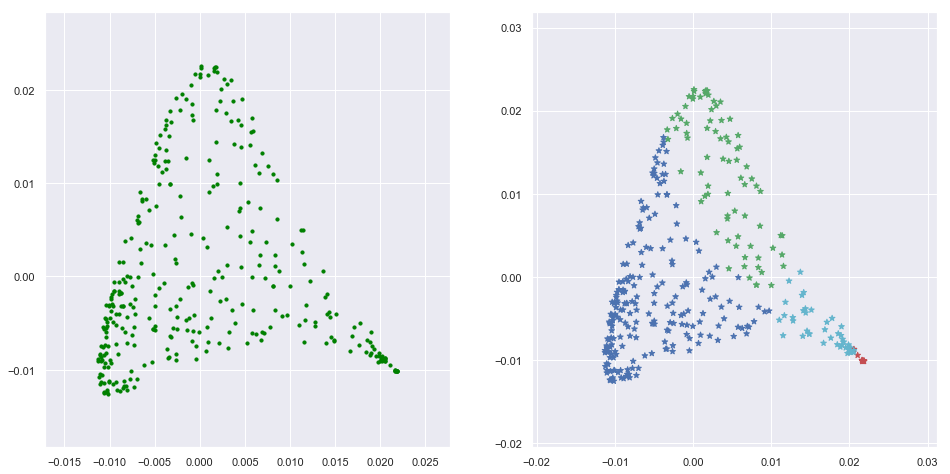

In [14]:

#----------------------------------------------------------------------
# 2D embedding of dataset
print("Computing embedding")
X_manifold = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[kmean.labels_], marker='*')

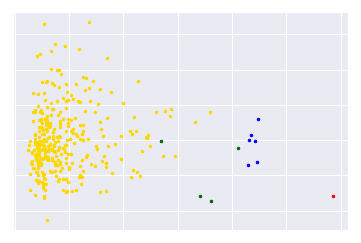

Cure Silhouette Coefficient: 0.846


In [15]:
#########Cure Clustreing#######
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
# from pyclustering.utils import read_sample;
# from pyclustering.samples.definitions import FCPS_SAMPLES;
# # Input data in following format [ [0.1, 0.5], [0.3, 0.1], ... ].
# input_data = read_sample(FCPS_SAMPLES.SAMPLE_LSUN);
# Allocate three clusters.
cure_instance = cure(list(X.values), 4);
cure_instance.process();
Cure_clusters = cure_instance.get_clusters();
# Visualize allocated clusters via PCA transform.
visualizer = cluster_visualizer();
visualizer.append_clusters(Cure_clusters, list(X_PCA));
visualizer.show();
Cure_label = np.zeros(len(X.values[:,0]))
label = 0
for clusster in Cure_clusters:
    label += 1
    for i in clusster:
        Cure_label[i] = label
print("Cure Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, Cure_label, metric='sqeuclidean'))
data['cure_labels'] = Cure_label


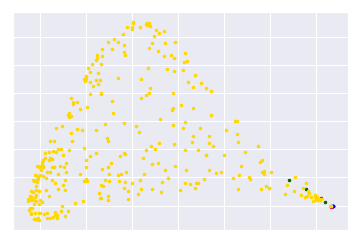

In [16]:
visualizer = cluster_visualizer();
visualizer.append_clusters(Cure_clusters, list(X_manifold));
visualizer.show();

In [17]:
from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=4, threshold=0.5, compute_labels=True)
brc.fit(X) 
# Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
#    threshold=0.5)
ClusterBirch = brc.predict(X)
print("Birch Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, ClusterBirch, metric='sqeuclidean'))
data['Birch_labels'] = ClusterBirch

Birch Silhouette Coefficient: 0.533


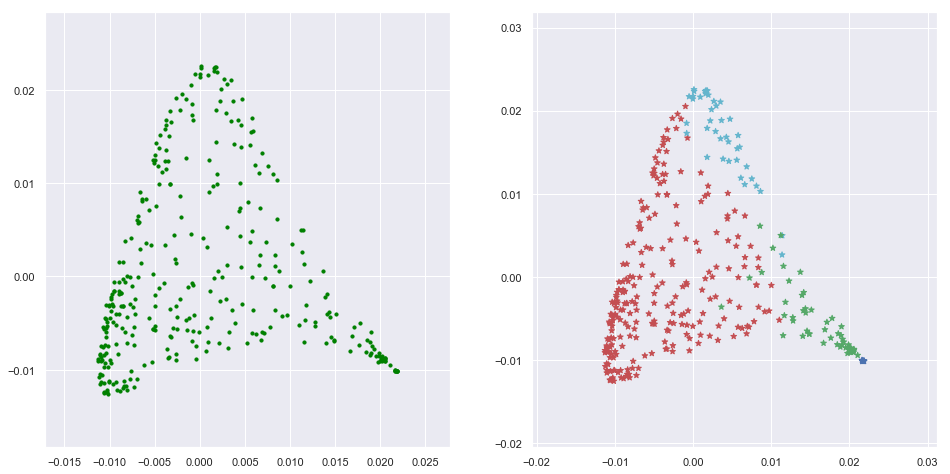

In [18]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[ClusterBirch], marker='*')

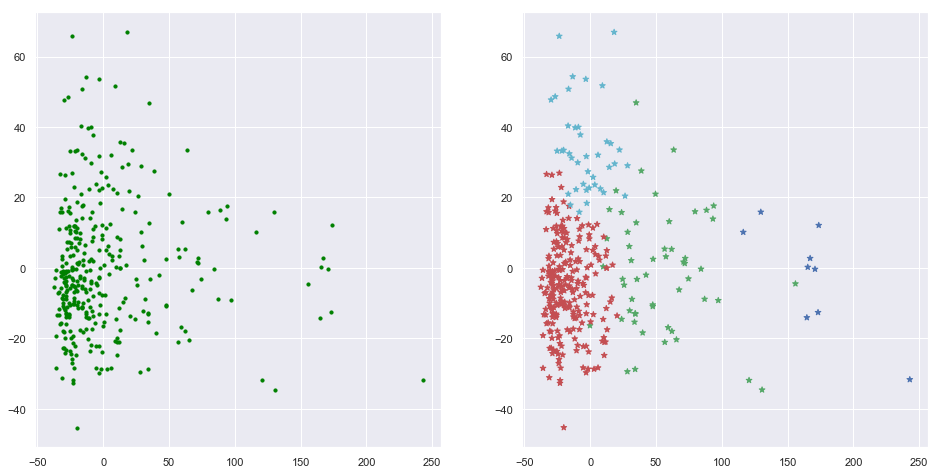

In [19]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[ClusterBirch], marker='*')

In [20]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-45000).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
clusterAffinityPropagation = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)


print("Affinity Propagation Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, clusterAffinityPropagation, metric='sqeuclidean'))
data['AffinityPropagation_labels'] = clusterAffinityPropagation


Estimated number of clusters: 4
Affinity Propagation Silhouette Coefficient: 0.373


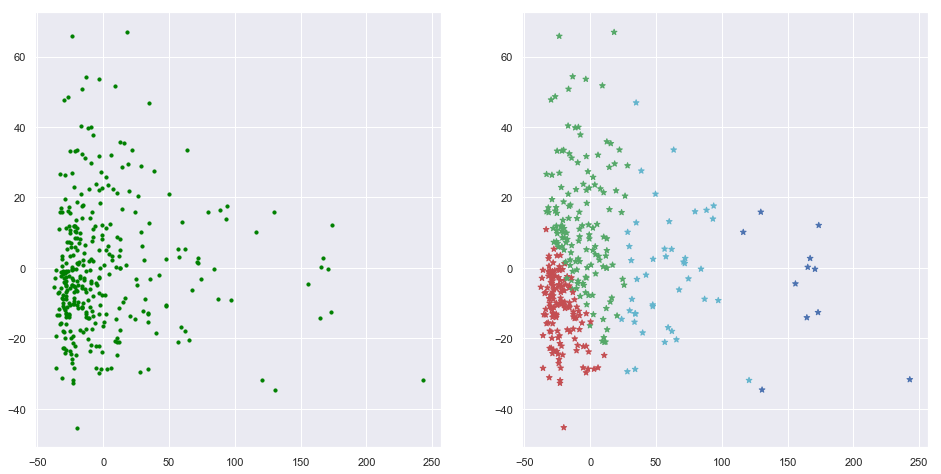

In [21]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[clusterAffinityPropagation], marker='*')

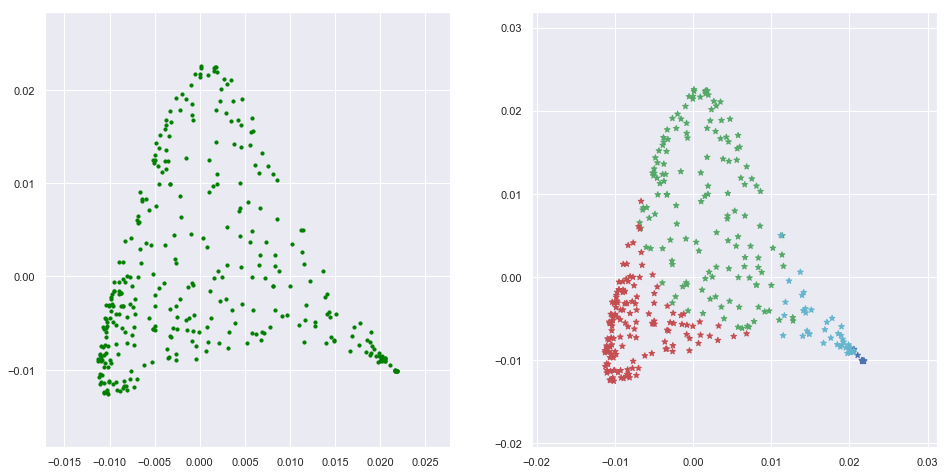

In [22]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[clusterAffinityPropagation], marker='*')

In [23]:
data.to_csv('result of clustering.csv', index=False)